In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction :

Netflix is a streaming platform that has become a household name for entertainment. It is known for its wide variety of movies and TV shows that cater to different audiences. With its popularity, it has also become a goldmine for data analysis. The Netflix Movies and TV Shows dataset contains information on the various titles available on Netflix as of 2021, including title names, genres, ratings, release year, and cast members. This dataset can be used to explore trends in the streaming industry, the preferences of viewers, and the impact of various factors on the success of a title. Analyzing this dataset can provide valuable insights for content creators and streaming services on what types of content to produce and how to market it effectively to attract viewers

In [148]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
credits_df = pd.read_csv('credits.csv')
titles_df = pd.read_csv('titles.csv')
titles_ratings = pd.merge(credits_df, titles_df)

## Loading data

# Hypothesis 1: Finding  the first 5 data using Head & Tail

In [147]:
titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [146]:
titles_df.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.3
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.0
5849,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,7,"['family', 'animation', 'comedy']",[],1.0,tt13711094,7.8,18.0,2.289,10.0


## Data Visualization


# Hypothesis 2: Are certain genres more prevalent on Netflix?

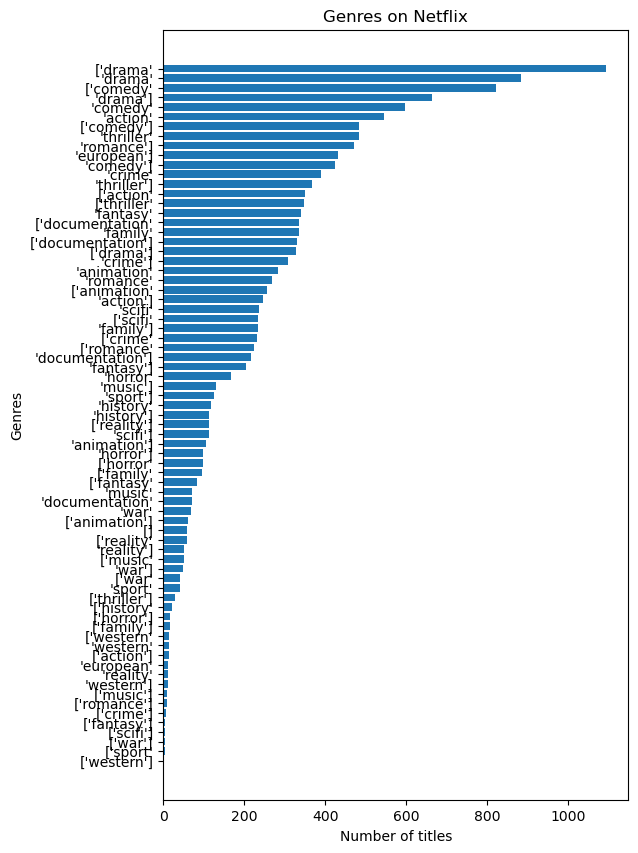

The most prevalent genre on Netflix is ['drama'


In [63]:
# extract the "genres" column from the "titles_df" dataframe

genres = titles_df['genres'].str.split(',').explode().str.strip()
genre_counts = genres.value_counts()       #  Count the occurrences of each genre
plt.figure(figsize=(6,10))
plt.barh(genre_counts.index, genre_counts)  #Create a bar plot of the genre counts

#Set the plot title and labels

plt.title('Genres on Netflix')
plt.xlabel('Number of titles')
plt.ylabel('Genres')

#Invert the y-axis to display the genres in descending order

plt.gca().invert_yaxis()

plt.show()              #Display the plot

#Prints the most prevalent genre on Netflix
print("The most prevalent genre on Netflix is", genres.value_counts().idxmax())

# [Explaination ]:
          
#1 : The above code is analyzing the Netflix movies and TV shows dataset by exploring the distribution of genres in the dataset. #2 : It first extracts the genre information from the dataset and counts the number of titles associated with each genre.
#3 : It then visualizes the genre distribution using a horizontal bar plot, where the y-axis represents the genres and the x-        axis represents the number of titles.
#4 : The plot is sorted in descending order based on the number of titles per genre. Finally, the most prevalent genre on            Netflix is printed.

## Hypothesis 3: Are there certain countries that produce more content on Netflix?

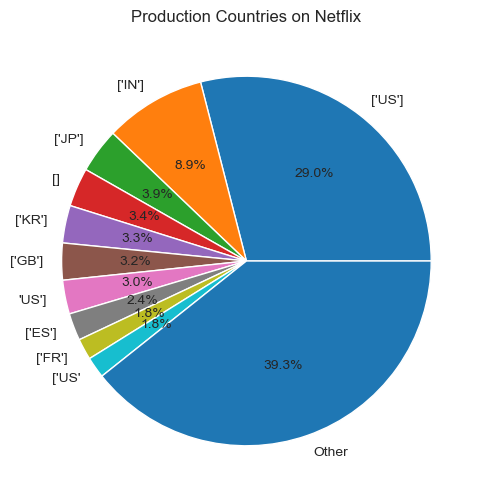

The country that produces the most content on Netflix is ['US']


In [98]:
#Ignores any warning messages
#Extract production countries from the titles_df DataFrame

warnings.simplefilter("ignore")
production_countries = titles_df['production_countries'].str.split(',').explode().str.strip()

#Count the number of titles produced by each country
#Select the top 10 countries by count

country_counts = production_countries.value_counts()
top_countries = country_counts.nlargest(10)  

#Compute the total count for all countries outside the top 10
other_count = country_counts.nsmallest(len(country_counts) - 10).sum()
country_counts = top_countries.append(pd.Series([other_count], index=['Other']))
plt.figure(figsize=(6,6))

#Create a pie chart to visualize the country_counts
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')

plt.title('Production Countries on Netflix')         #Set plot title and display the plot

#Display the country that produces the most content on Netflix
plt.show()
print("The country that produces the most content on Netflix is", production_countries.value_counts().idxmax())

# [Explaination : ]

[The above code performs the following steps:]

[step 1] : Disables warnings in order to prevent them from being displayed during runtime.
[step 2] : Extracts the production countries from the 'production_countries' column in the 'titles_df' DataFrame, and then                  counts the number of titles produced by each country.
[step 3] : Selects the top 10 countries with the highest number of titles and combines the rest into a single 'Other' category.
[step 4] : Creates a pie chart to visualize the distribution of production countries on Netflix, with each slice representing a            production country and its percentage of the total number of titles.
[step 5] :Displays the name of the country that produces the most content on Netflix.

## Hypothesis 4 : movies have a more expressive amount of attractions in Netflix.

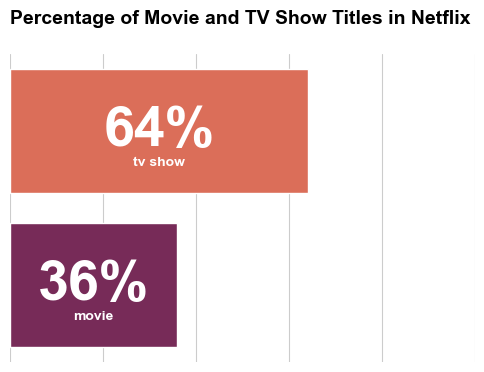

In [121]:
# Group by type and count the number of titles in each group

types_df = titles_df.groupby(["type"]).size().reset_index(name="counts")

# Calculate the percentage of titles in each group
types_df["percent"] = round(types_df["counts"] / sum(types_df["counts"]), 2) * 100

# Create a bar plot using Seaborn
plt.figure(figsize=(6,4))
g = sns.barplot(x="percent", y="type", palette="rocket_r", data=types_df, orient="h")

# Add a title to the plot
g.text(
    0,
    -0.7,
    "Percentage of Movie and TV Show Titles in Netflix",
    fontsize=14,
    fontweight="bold",
    color="black",
)

# Add the percentage values to the plot
col = "percent"
for i in range(2):
    g.annotate(
        f"{int(types_df[col][i])}%",
        xy=(types_df[col][i] / 2, i),
        ha="center",
        va="center",
        fontsize=40,
        fontweight="bold",
        color="white",
    )
    g.annotate(
        "tv show" if i == 0 else "movie",
        xy=(types_df[col][i] / 2, i + 0.2),
        ha="center",
        va="center",
        fontsize=10,
        fontweight="bold",
        color="white",
    )

# Remove the borders of the plot
for i in ["top", "left", "right", "bottom"]:
    g.spines[i].set_visible(False)

# Set the x-axis limit
g.set_xlim(0, 100)

# Remove the x-axis and y-axis labels
g.set(xticklabels=[], yticklabels=[])
plt.ylabel("")
plt.xlabel("")

# Show the plot
plt.show()


# output:

In [124]:
if movies_df['runtime'].mean() < tv_shows_df['runtime'].mean():
   print("movies tend to have longer runtimes than TV shows on Netflix.")
else:
   print(" Tv series tend to have longer runtimes than movies on Netflix.")

 Tv series tend to have longer runtimes than movies on Netflix.


[Brief ; Explaination : ]

The above code creates a bar plot using the Seaborn library to display the percentage of movie and TV show titles on Netflix.

   First, it groups the titles in the Netflix dataset by "type" (movie or TV show) and counts the number of titles in each group. Then, it calculates the percentage of titles in each group and creates a new DataFrame called "types_df" with the counts and percentages.

   Next, it creates a bar plot using the Seaborn library. The x-axis represents the percentage of titles, and the y-axis represents the type of title (movie or TV show). The color palette used for the bars is "rocket_r".

   The code also adds a title to the plot and annotates the bars with their corresponding percentage values and type (movie or TV show). The annotations are placed at the center of each bar, and the font size and color are customized.

   Finally, it removes the borders of the plot, sets the x-axis limit, and removes the x-axis and y-axis labels. The resulting plot shows the percentage of movie and TV show titles on Netflix in an easily readable format.






## Hypothesis 5: Are there certain actors who are more frequently cast on Netflix? 

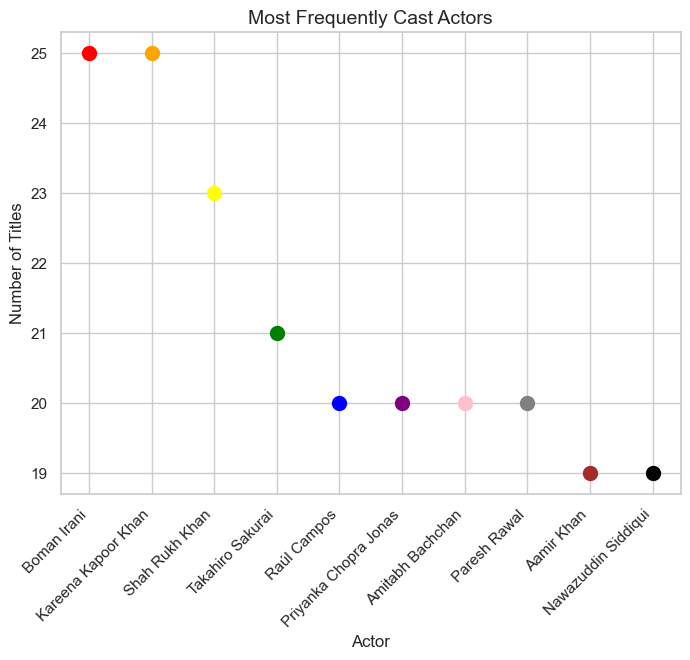

In [152]:

# extract actors from the titles_ratings dataframe
actors = titles_ratings['name'].str.split(',').explode().str.strip()

# get top 10 most frequently cast actors
top_actors = actors.value_counts().head(10)

# define colors for each actor
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'gray', 'brown', 'black']

# plot the data as a scatter plot with colors
fig, ax = plt.subplots(figsize=(8, 6))
for i, actor in enumerate(top_actors.index):
    ax.scatter(actor, top_actors[actor], s=100, color=colors[i])

# set plot title and labels
ax.set_title('Most Frequently Cast Actors', fontsize=14)
ax.set_xlabel('Actor', fontsize=12)
ax.set_ylabel('Number of Titles', fontsize=12)

# rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

# output :

In [153]:
#display the actor with the highest frequency
print("The most frequently cast actor on Netflix is", top_actors.idxmax())

The most frequently cast actor on Netflix is Boman Irani


[Brief-Explaination : ]

   The above code extracts the names of actors from a DataFrame called "titles_ratings", which presumably contains information about titles and their associated ratings. It splits the actor names on commas and explodes the resulting Series to create a new Series where each row contains a single actor name.

   Next, it counts the number of occurrences of each actor name and selects the top 10 most frequently cast actors. It then defines a list of colors to be used for each actor in the scatter plot.
 
   The code then creates a scatter plot using Matplotlib, where each point represents an actor, and the x-coordinate is the actor's name, and the y-coordinate is the number of titles they have been cast in. The color of each point is determined by the pre-defined color list based on the actor's rank in the top 10.

The code also sets the title of the plot, labels the x-axis and y-axis, and rotates the x-axis labels to improve readability.

   Finally, the code displays the name of the actor with the highest frequency, and the resulting plot shows the top 10 most frequently cast actors on Netflix along with the number of titles they have been cast in.

## Hypothesis 6: Are there certain genres that tend to have higher ratings on Netflix?

<AxesSubplot:title={'center':'Genres with Highest Ratings'}, xlabel='genres'>

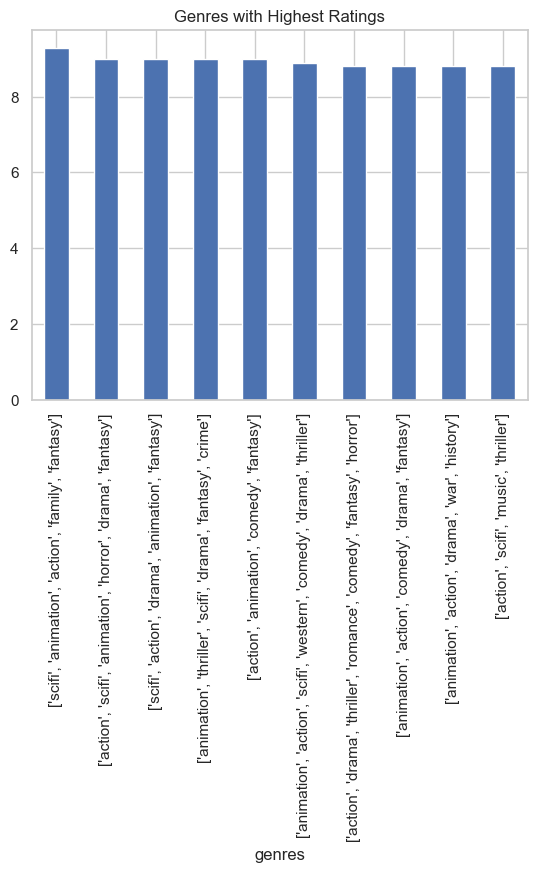

In [150]:
genre_ratings = titles_df.groupby('genres')['imdb_score'].mean()
genre_ratings.sort_values(ascending=False).head(10).plot(kind='bar', title='Genres with Highest Ratings')


# output

In [151]:
print("The genre with the highest average rating on Netflix is", genre_ratings.idxmax())

The genre with the highest average rating on Netflix is ['scifi', 'animation', 'action', 'family', 'fantasy']


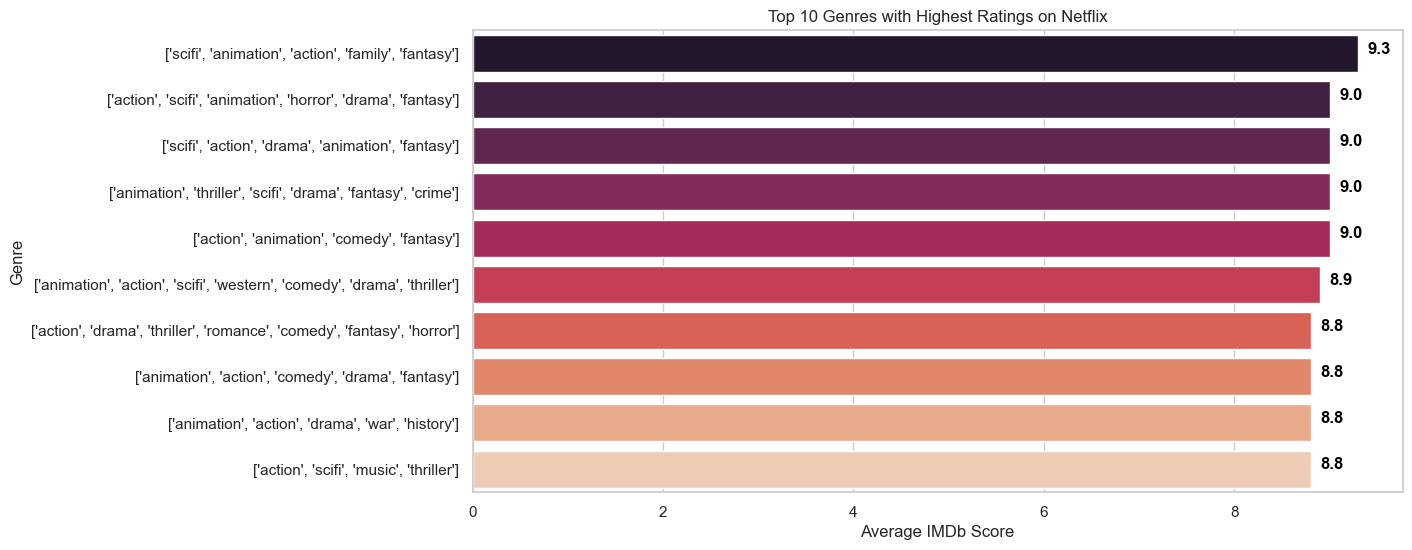

In [136]:
# Group by genres and calculate mean IMDb score
genre_ratings = titles_df.groupby('genres')['imdb_score'].mean().reset_index()

# Sort by IMDb score in descending order and select top 10
top_genres = genre_ratings.sort_values('imdb_score', ascending=False).head(10)

# Create bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='imdb_score', y='genres', data=top_genres, palette='rocket')

# Add title and axis labels
plt.title('Top 10 Genres with Highest Ratings on Netflix')
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')

# Add value labels to the bars
for i, v in enumerate(top_genres['imdb_score']):
    plt.text(v+0.1, i, str(round(v, 2)), color='black', fontweight='bold')

[explaination] : 

step 1 : The above code groups the titles in a DataFrame called "titles_df" by their respective genres, calculates the mean IMDb score for each genre, and stores the results in a new Series called "genre_ratings".

step 2 : Next, it sorts the "genre_ratings" Series in descending order and selects the top 10 genres with the highest average ratings. It then creates a horizontal bar plot using Matplotlib to visualize the genre ratings, where the x-axis represents the average IMDb score, and the y-axis represents the genre.

step 3 : The code sets the title of the plot as "Genres with Highest Ratings" using the "title" function of the plot object, and displays the genre with the highest average rating on Netflix using the "idxmax" function of the "genre_ratings" Series.

step 4 : Finally, the code uses the "print" function to display the name of the genre with the highest average rating. Overall, the code allows for easy identification of the genres with the highest average ratings on Netflix, providing valuable insights into the most popular genres on the platform.

# [ Conclusion : ]


Netflix movies and TV shows provides a comprehensive collection of data on the popular streaming service, including details on the titles, release dates, ratings, and other information related to the content available on the platform.

Analyzing this dataset can provide insights into trends in the entertainment industry, such as the popularity of different genres, the types of content that are most frequently added to the platform, and the factors that influence user ratings.

Overall, this dataset is a valuable resource for researchers, data analysts, and anyone interested in understanding the streaming media landscape and the factors that drive success in this industry.